# Imported Library

In [47]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns
from termcolor import colored

from sklearn.dummy import DummyClassifier 
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, f1_score
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import scikitplot as skplt
from scikitplot.estimators import plot_learning_curve
from sklearn.model_selection import StratifiedKFold
from functools import partial
from hyperopt import hp
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import xgboost as xgb
import lightgbm as lgb
import catboost as ctb
plt.rcParams['figure.figsize']=(12,4)
import seaborn as sns
from collections import defaultdict

import matplotlib.pyplot as plt
%matplotlib inline

# Imported Data

In [2]:
df = pd.read_csv("../Data/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Feature Engineering

In [5]:
df['Sex_cat'] = df['Sex'].factorize()[]

In [6]:
df['Sex_cat']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex_cat, Length: 891, dtype: int64

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_cat
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_cat'],
      dtype='object')

In [12]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [15]:
df.shape

(891, 13)

In [18]:
for column in df.columns:
    print(colored("Unique value: {0}".format(column),'blue',attrs=['bold','blink','underline']))
    print(df[column].unique())

Unique value: PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 

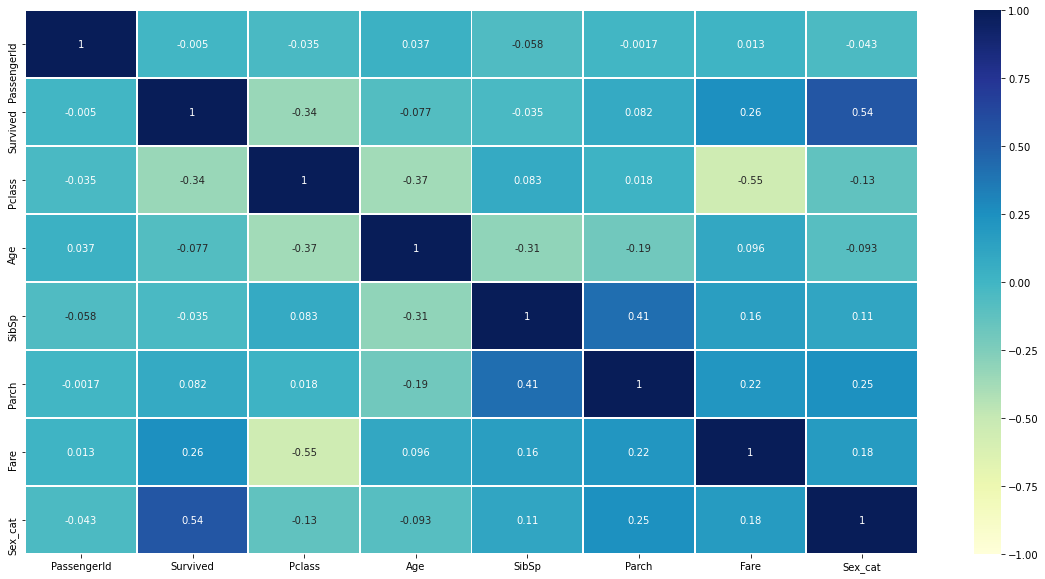

In [20]:
plt.rcParams['figure.figsize']=(20,10)
sns.heatmap(df.corr(), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="YlGnBu");

In [21]:
for column in df.columns:
    print(colored("Unique value: {0}".format(column),'blue',attrs=['bold','blink','underline']))
    print(df[column].value_counts())

Unique value: PassengerId
891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64
Unique value: Survived
0    549
1    342
Name: Survived, dtype: int64
Unique value: Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
Unique value: Name
Thayer, Mr. John Borland Jr                                1
Davidson, Mr. Thornton                                     1
Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)    1
Taussig, Mrs. Emil (Tillie Mandelbaum)                     1
Richard, Mr. Emile                                         1
                                                          ..
Klasen, Mr. Klas Albin                                     1
Arnold-Franchi, Mr. Josef                                  1
Van der hoef, Mr. Wyckoff                                  1
Van Impe, Miss. Catharina                                  1
Lester, Mr. James                                       

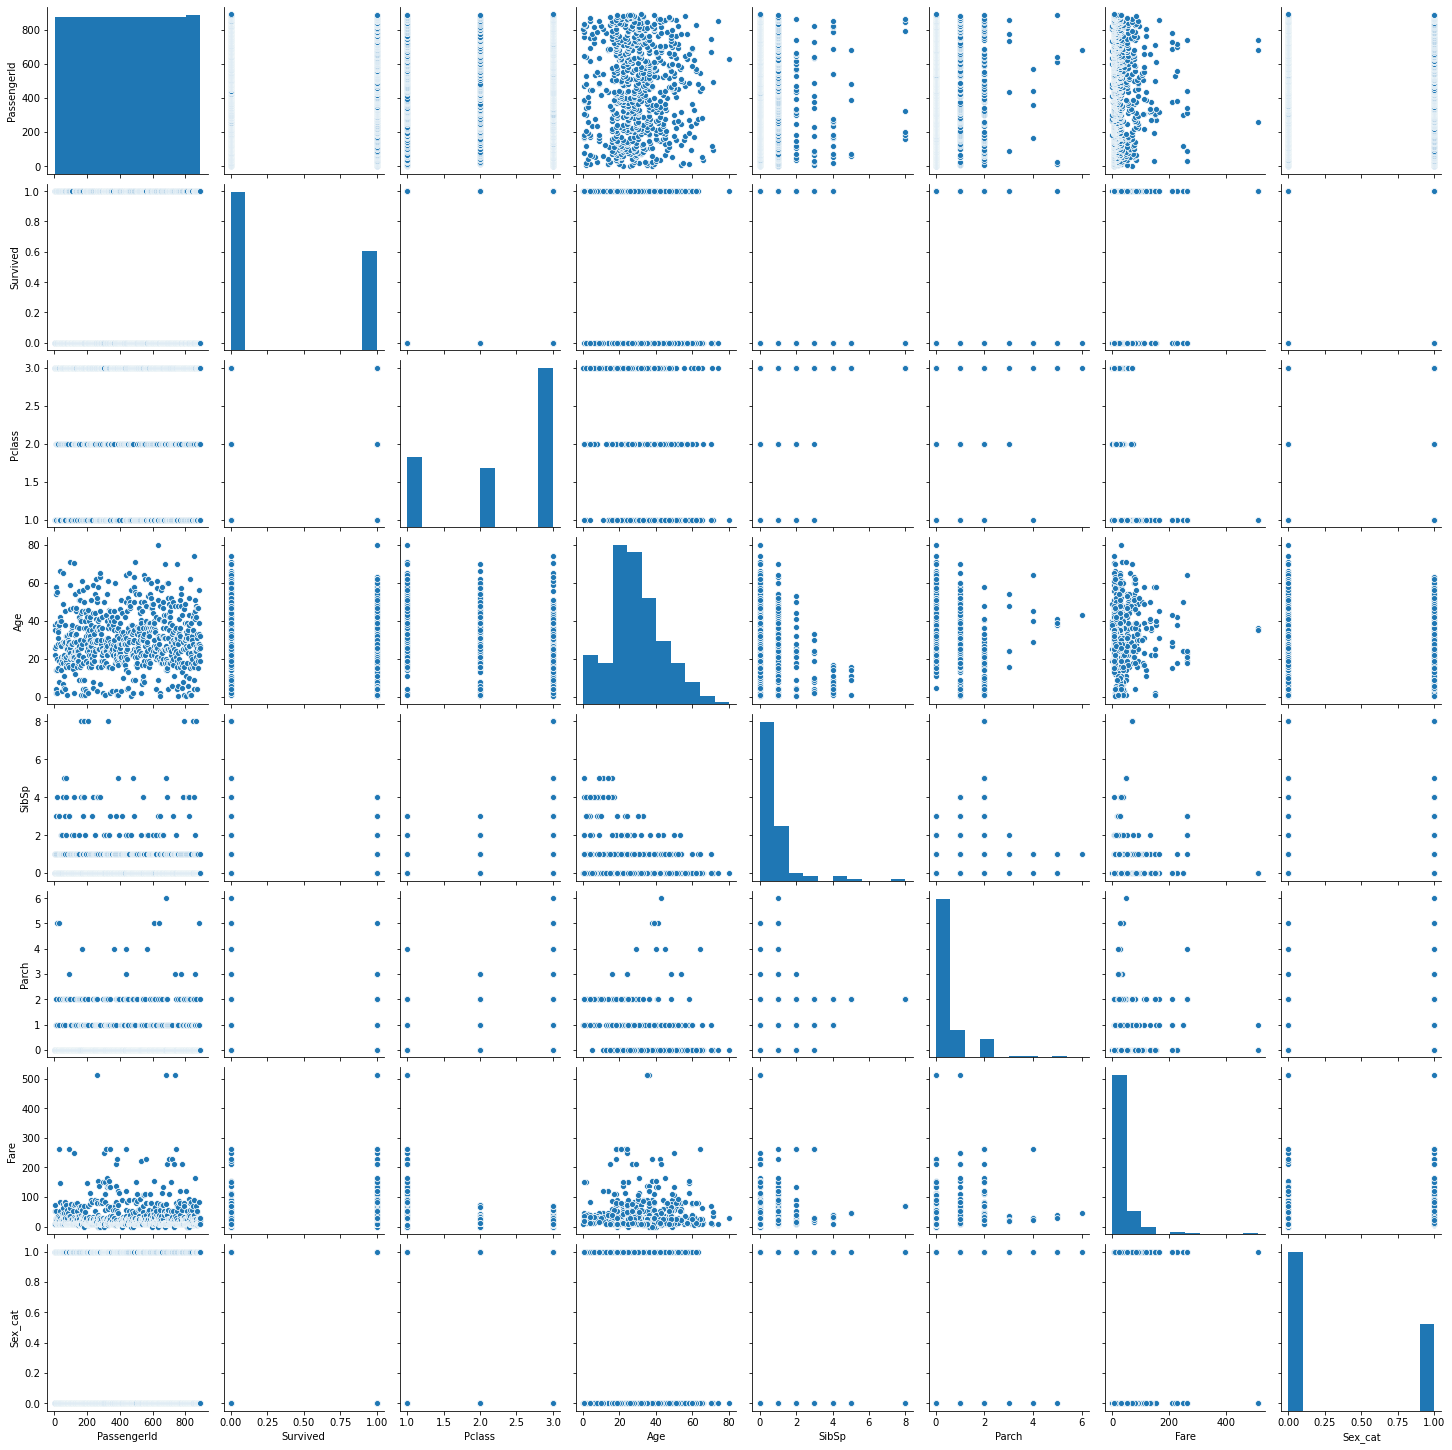

In [23]:
sns.pairplot(df);

In [24]:
pd.pivot_table(df, index=['Survived', 'Pclass'], values='Age', aggfunc='mean')

Age
Survived Pclass           
0        1       43.695312
         2       33.544444
         3       26.555556
1        1       35.368197
         2       25.901566
         3       20.646118

In [30]:
pd.pivot_table(df, index=['Sex'], values='Survived', aggfunc='mean')

,Survived
Sex,
female,0.742038
male,0.188908


In [26]:
pd.pivot_table(df, index=['Sex', 'Pclass'], values='Survived', aggfunc='mean')

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [32]:
df['title'] = df['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())

In [39]:
df['title'].nunique()

17

In [40]:
df['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [41]:
df['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Lady              1
Mme               1
Capt              1
Jonkheer          1
Don               1
Ms                1
the Countess      1
Sir               1
Name: title, dtype: int64

In [43]:
top_titles = list(df['title'].value_counts().head(6).keys())



In [44]:
top_titles

['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev']

In [48]:
title_norm = defaultdict(lambda: 'other', dict(zip(top_titles, top_titles)))

In [54]:
title_norm

defaultdict(<function __main__.<lambda>()>,
            {'Mr': 'Mr',
             'Miss': 'Miss',
             'Mrs': 'Mrs',
             'Master': 'Master',
             'Dr': 'Dr',
             'Rev': 'Rev',
             'Don': 'other',
             'Mme': 'other',
             'Ms': 'other',
             'Major': 'other',
             'Lady': 'other',
             'Sir': 'other',
             'Mlle': 'other',
             'Col': 'other',
             'Capt': 'other',
             'the Countess': 'other',
             'Jonkheer': 'other'})

In [51]:
df['title_norm'] = df['title'].map(title_norm)

In [53]:
df['title_norm'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
other      14
Dr          7
Rev         6
Name: title_norm, dtype: int64

In [56]:
df['title_norm_cat'] = df['title_norm'].factorize()[0]